In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [2]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
main_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,23,94,28.1,0.167,21,0
1,137,40,35,168,43.1,2.288,33,1
2,78,50,32,88,31.0,0.248,26,1
3,166,72,19,175,25.8,0.587,51,1
4,115,70,30,96,34.6,0.529,32,1


In [3]:
X = main_df.drop(columns=["Outcome"])
y = main_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [5]:
# Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.75
F1 Score (test): 0.75
Precision (test): 0.75
Recall (test): 0.75
Mean Squared Error (test): 0.25

Accuracy (train): 1.0
F1 Score (train): 1.0
Precision (train): 1.0
Recall (train): 1.0
Mean Squared Error (train): 0.0


In [6]:
model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [7]:
# Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.7666666666666667
F1 Score (test): 0.7666666666666667
Precision (test): 0.7666666666666667
Recall (test): 0.7666666666666667
Mean Squared Error (test): 0.23333333333333334

Accuracy (train): 0.9747899159663865
F1 Score (train): 0.9747899159663865
Precision (train): 0.9747899159663865
Recall (train): 0.9747899159663865
Mean Squared Error (train): 0.025210084033613446


In [8]:
model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

best_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Mejores hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Mejor puntuación: 0.8278368794326243


In [9]:
# Predict
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.8
F1 Score (test): 0.8
Precision (test): 0.8
Recall (test): 0.8
Mean Squared Error (test): 0.2

Accuracy (train): 0.9789915966386554
F1 Score (train): 0.9789915966386554
Precision (train): 0.9789915966386554
Recall (train): 0.9789915966386554
Mean Squared Error (train): 0.02100840336134454


In [10]:
best_model.save_model("../models/xgb_classifier_best.json")

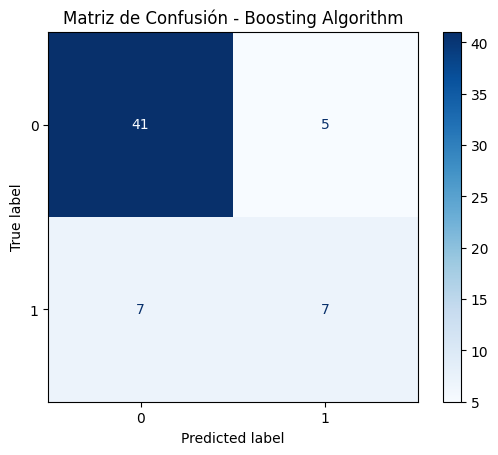

In [11]:
# Confusion matrix
y_pred_test = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Boosting Algorithm")
plt.show()

<h3>Comparación de modelos</h3>
Tras analizar los tres modelos aplicados sobre el mismo dataset, podríamos concluir que Boosting Algorithm tiene la mayor precisión para la clase 0 (85.42%) y también para la clase 1 (58.33%) en comparación con los otros modelos, mientras que Random Forest y Decision Tree presentan menor precisión en la clase positiva (1), lo que puede ser un factor decisivo.

Dado que el Boosting Algorithm logra un mejor equilibrio entre precisión general (Accuracy del 80%) y precisión en ambas clases, y tiene un buen rendimiento sin sobreajustarse en el entrenamiento, se consideraría la mejor opción.